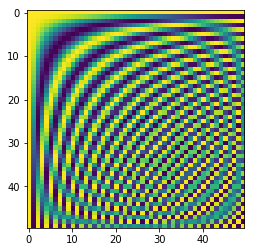

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: covariance is not symmetric positive-semidefinite.


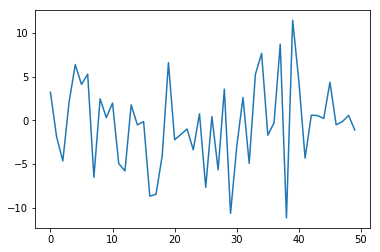

50


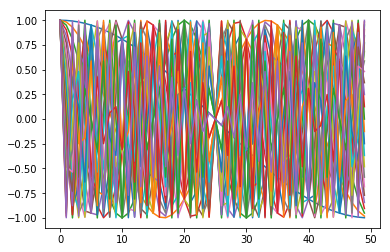

In [15]:
import numpy as np
import matplotlib.pyplot as plt
rank = np.linalg.matrix_rank

N = 50
m,n = np.mgrid[0:N,0:N]
x = np.linspace(0,1, N)

@np.vectorize
def K(m,n,l):
    d = np.abs(m-n)*1.
    #return min(m,n)
    #return np.exp(-abs(m-n)**2/(2*l**2))
    return np.cos(m*n*np.pi/N)
    #return (1+d**2)**-l
    #return np.exp(-d/l)
    #return m*n

def randv(mu, Sigma):
    size = np.size(Sigma[0,:])
    v = np.random.randn(size)
    return mu + Sigma @ v



C = K(m,n,20)
mu = np.zeros(N)

plt.imshow(C)
plt.show()


v2 = np.random.multivariate_normal(mu,C)
#plt.plot(v1)
for i in range(1):
    v = randv(mu,C)
    plt.plot(v)
plt.show()

plt.plot(C[:,1::2])
print(rank(C))

0.0


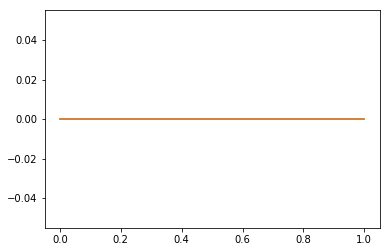

In [3]:
def T(f):
    f_prime = np.diff(f)
    out = np.sum((f_prime)**2)
    return out
    
f_mu = 0*100*np.cos(x)
f0 = f_mu

def get_J(f0 = np.zeros(N), B = np.eye(N), ss = 0.00001):
    J = np.zeros(N)
    for i in range(N):
        T_fwd = T(f0 + ss*B[i]) 
        T_bwd = T(f0 - ss*B[i])
        J[i] = (T_fwd - T_bwd)/(2*ss)
    return J
J = get_J(f_mu,ss=.001) 
plt.plot(x,f_mu)
plt.plot(x,J)
print(np.sum(J))
plt.show()


In [201]:
#test frechet
ss = 0.001
FR = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        rt2 = np.sqrt(2.0)
        d_i = (T(f0 + ss*B[i]) - T(f0 - ss*B[i]))/(2*ss)
        d_j = (T(f0 + ss*B[j]) - T(f0 - ss*B[j]))/(2*ss) 
        d_ij= (T(f0 + rt2*ss*(B[i] + B[j])) - T(f0 - rt2*ss*(B[i] + B[j])))/(2*ss) 
        FR[i,j]: d_i + d_j - d_ij
plt.imshow(FR)

ValueError: operands could not be broadcast together with shapes (500,) (100,) 

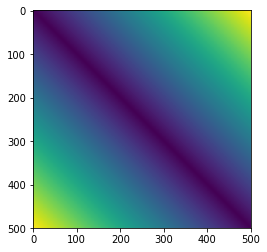

In [193]:
def g(x,y):
    return abs(y-x)
    
    
plt.imshow(g(m,n))